# Lets explore this dataset first
## data is courtesy of metal-archives.com

In [1]:
#packages
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('Data/band_20220130.csv')

In [2]:
df.describe()

,Band,Genre,Location,Years active
count,33859,33859,32869,23703
unique,31132,3589,6101,6006
top,Monolith,Black Metal,"Los Angeles, California",2012-Present
freq,14,2927,1081,665


In [3]:
df.head()

,Band,Genre,Location,Years active
0,۞,Black Metal,NaN,NaN
1,...and Here I Lie,Death/Doom Metal,"Holley, New York","1994-2000, 2007-2007"
2,...and They Will Meet God,Melodic Death Metal/Crossover,"Palestine, Texas",2002-?
3,...in Agony of the Eclipsed Moon,Black Metal/Dark Ambient,"Midland City, Alabama",NaN
4,...Under a Full Moon,Black/Doom Metal,"Midland, Michigan (early); North Carolina / No...","2016-2017 (as Disrhythmia), 2017-Present"


So it looks like four columns, location can be a bit tricky since its comma deliminited several times possibly. Also Years active is the same way and includes the other band. Going to do some definite parsing here for this..

In [4]:
#looks like some NANs
#build pretty NAN function keep for later
def get_nans(dataframe,plot=False):
    '''
    gives a dataframe and returns a dataframe which counts number of NANs per column
    and the pct of total records. can return dataframe OR a plot use seaborn and matplot
    
        
    '''
    if plot == False:
        nans_count = dataframe.isna().sum()
        dataframe_len = len(dataframe)
        nan_df = pd.DataFrame(nans_count, columns = ['NA_Count'])
        nan_df['NA_pct'] = (nan_df['NA_Count']/dataframe_len)*100
        #simply returns the dataframe which is still nice
        return nan_df
    else:
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        nans_count = dataframe.isna().sum()
        dataframe_len = len(dataframe)
        nan_df = pd.DataFrame(nans_count, columns = ['NA_Count'])
        nan_df['NA_pct'] = (nan_df['NA_Count']/dataframe_len)*100
        
        sns.set_theme(style="darkgrid")
        plt.figure(figsize=(12, 6))
        plots = sns.barplot(data = nan_df, x = 'NA_pct', y = nan_df.index)
        #would like to have a future improvement where this annotates the count and the percentage
        for bar in plots.patches:
            width = bar.get_width()
            plt.text(2+bar.get_width(), bar.get_y()+0.5*bar.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
        plt.title('NANS Plot')
        #returns the dataframe
        return plt.show()


get_nans(df,plot = True)

<Figure size 1200x600 with 1 Axes>

so years active as almost 30% of the records being NA, so i might have to drop those, in addition although a mere 2.92% of the location is not blank i possibly may need to drop these too. I'll do that in seperate notebook. i'm thinking its best to maybe look at most popular genre groupings

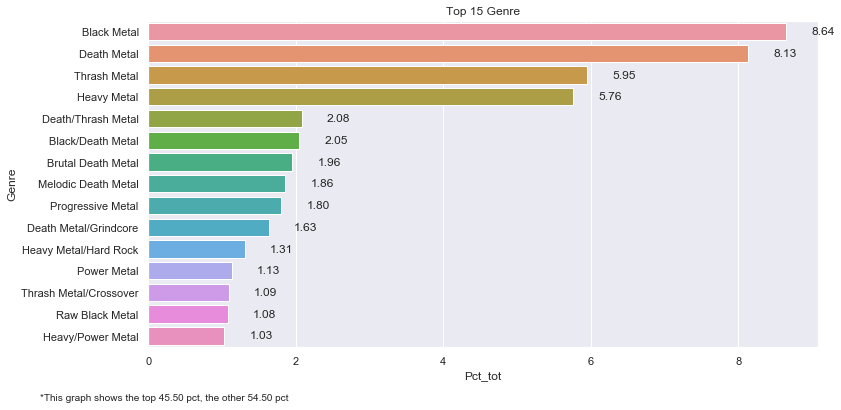

In [5]:
#build pretty function for unique counts

def get_unique_col_vals(dataframe,column, plot = False, pct = True,plot_cutoff = 10):
    '''
    accepts only dataframes. will return dataframe of unique counts of specific row
    will also plot the values if specified
    since there is a possibilty of gettings 
    
    '''
    if plot == False:
        unique_cols = dataframe.groupby(column)[column].agg(['count']).reset_index().sort_values('count',ascending = False) 
        unique_cols['Pct_tot'] = 100*unique_cols['count']/unique_cols['count'].sum()
        #returns dataframe with count and pct of total 
        return unique_cols
    else:
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        unique_cols = dataframe.groupby(column)[column].agg(['count']).reset_index().sort_values('count',ascending = False) 
        unique_cols['Pct_tot'] = 100*unique_cols['count']/unique_cols['count'].sum()
        cutoff = unique_cols.iloc[0:plot_cutoff,].reset_index(drop = True)
        remaining = unique_cols.iloc[plot_cutoff:len(unique_cols),]
        #get sums of cutt off and remaining
        cutoff_sum = sum(cutoff['Pct_tot'])
        remain_sum = sum(remaining['Pct_tot'])
        
        
        sns.set_theme(style="darkgrid")
        plt.figure(figsize=(12, 6))
        plots = sns.barplot(data = cutoff, x = 'Pct_tot', y = 'Genre')
        #would like to have a future improvement where this annotates the count and the percentage
        for bar in plots.patches:
            width = bar.get_width()
            plt.text(.5+bar.get_width(), bar.get_y()+0.5*bar.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
        plt.title('Top '+str(plot_cutoff)+' '+column)
        plt.figtext(0, 0, "*This graph shows the top {:1.2f} pct, the other {:1.2f} pct ".format(cutoff_sum, remain_sum), fontsize = 10)
        #returns the dataframe
        return plt.show()        


    
    
test_ = get_unique_col_vals(df,'Genre',plot=True,plot_cutoff = 15)



so on second thought lets see how many unique Genre's there are

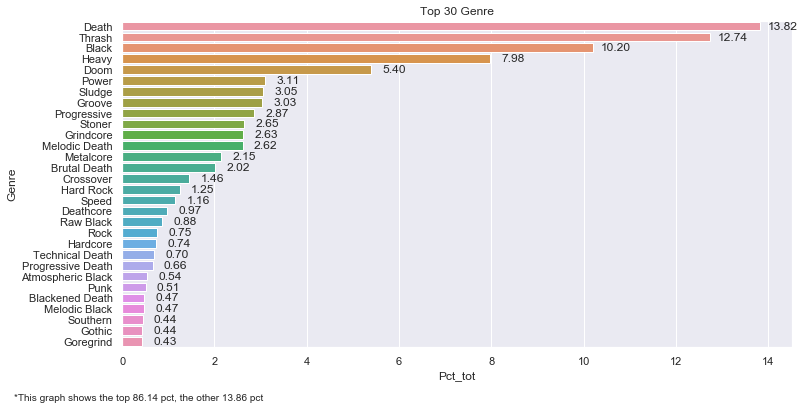

In [6]:
#since the forward slash is a delimiter going to use that and stack all the genre's. lets get a count this way
#and see waht happens, not shown but since the word Metal appears so often we are going to remove it before we 
#do the split. Should make aggregations a bit better
df['Genre_wo_metal'] = df['Genre'].str.replace(' Metal','')

genre_listed = df['Genre_wo_metal'].str.split('/', n = 2, expand = True).stack().reset_index(drop = True).to_frame(name='Genre')

genre_listed_plot = get_unique_col_vals(genre_listed,'Genre',plot=True,plot_cutoff=30)



So this is probably a better representation of the actual Genre counts. this is fascinating because this greatly blows away the 80/20 rule. above is the top 30 by raw counts, while the overall number of unique Genre's is 1518. So less than 2% of the Genres account of 86.14% of the total population. The reverse must be interesting

In [7]:
#bit of rabbit hole i was curious if you interate on different cut off. using the previous dataset from before
genre_list_counts = get_unique_col_vals(genre_listed,'Genre')
list_of_pct = []

for i in range(len(genre_list_counts)):
    c_off = i+1
    group1 = genre_list_counts.iloc[0:c_off,]
    group2 = genre_list_counts.iloc[c_off:len(genre_list_counts),]
        #get sums of cutt off and remaining
    group_1_sum = sum(group1['Pct_tot'])
    group_2_sum = sum(group2['Pct_tot'])
    
    group_1_length = len(group1)
    
    list_of_pct.append([group_1_length, group_1_sum])
    
pct_df = pd.DataFrame(list_of_pct,columns=['Top Genre','Pct of Total'])




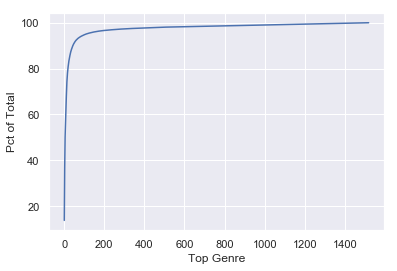

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=pct_df, x = 'Top Genre', y= 'Pct of Total')
plt.show()

so issue here now is at what point should i jsut group other genre. i think 50 is probably the best number. its roughly where the crest is the graph is. so going forward in data wrangling anything in the "over 50" grouping is basically going to be a mixture form

one thing that might be interesting is what the NAN's look like. If i drop it its going to likely affect the Genre distribution. i'l have to make a mask and then possibly do a statistical test on what happens when these are removed.

In [9]:
#make mask for NANs for the years active and genre columns
df['Years_Active_NAN'] = pd.isna(df['Years active'])
df['Loc_NAN'] = pd.isna(df['Location'])

#create anthoer split preserving the index and then merge with Years_active_nan
genre_listed_in = df['Genre_wo_metal'].str.split('/', n = 2, expand = True).stack().reset_index(drop = False)
genre_listed_in = genre_listed_in.merge(df[['Years_Active_NAN']],left_on = ['level_0'], right_index = True)
genre_listed_in.rename(columns={ genre_listed_in.columns[2]: "Genre" }, inplace = True)

#get top 50 genre's
genre_top_50 = get_unique_col_vals(genre_listed,'Genre',plot=False).head(50)['Genre'].to_list()
genre_listed_in['Genre_recoded'] = np.where(genre_listed_in["Genre"].isin(genre_top_50), genre_listed_in["Genre"], "Other")

#make cross tabe of data and check for independence
g_nan_ctab = pd.crosstab(index = genre_listed_in['Genre_recoded'],columns = genre_listed_in['Years_Active_NAN'],margins = False)

from scipy.stats import chi2_contingency 

stat, p, dof, ex = chi2_contingency(g_nan_ctab) 
 
print(stat)
 
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

672.8421325886392
p value: 6.007791633122958e-110
Reject NULL HYPOTHESIS


So was not hoping for this. the null hypothesis is rejected so there IS corrleation between the NANs and the genre. which means there's probably quite a few bands that are dependant on the year. So there's two options here. I could either try to iterate through each genre i have and see which ones are statistically significnat OR i could try to impute the start year using a KNN or some other model method

In [20]:
df.tail(20)


,Band,Genre,Location,Years active,Genre_wo_metal,Years_Active_NAN,Loc_NAN,Genre_recoded
33839,Zyclops,Atmospheric Sludge Metal,"Austin, Texas",nan,Atmospheric Sludge,True,False,Other
33840,Zyglrox,Progressive Metal/Rock,"Salt Lake City, Utah",2015-Present,Progressive/Rock,False,False,Other
33841,Zygmythkaupt,Black Metal,"Cleveland, Ohio",2012-Present,Black,False,False,Black
33842,Zygotical,Black Metal,"Los Angeles, California",2016-2018,Black,False,False,Black
33843,Zyklon Ritual,Black Metal,"Chicago, Illinois",2019-Present,Black,False,False,Black
33844,Zyklon-B,Death Metal,"Thornton, Illinois",1987-1989,Death,False,False,Death
33845,Zyklóne,Power/Speed Metal,"Cleveland, Ohio","1988-1988 (as Greg Perry Project), 1988-1989",Power/Speed,False,False,Other
33846,Zyl,Experimental Sludge Metal,"Portland, Oregon",nan,Experimental Sludge,True,False,Other
33847,Zymotic Radix,Black Metal,"Oklahoma City, Oklahoma",nan,Black,True,False,Black
33848,Zyprexian,Raw Black Metal,California,"?-2020 (as Svartgaldr), 2020-Present",Raw Black,False,False,Raw Black


In [18]:
#build a loop to get all of the detail data for where bands started and ended
#re-use code from previous cell
import regex as re
from tqdm import tqdm
import time


df['Genre_recoded'] = np.where(df["Genre_wo_metal"].isin(genre_top_50), df["Genre_wo_metal"], "Other")
df['Location'] = df['Location'].astype(str)
df['Years active'] = df['Years active'].astype(str)

list_20 = df.head(20).copy()
empty_df = pd.DataFrame()

# df.dtypes
for index, row in tqdm(list_20.iterrows(), total = list_20.shape[0]):
    
    '''
    get any pertinent info, this will end up being a new dataframe
    going to then merged this with the original to preserve original data
    
    '''
    band_ = row['Band']
    locations_num = row['Location'].count(',')
    years_act_num = row['Years active'].count(',')

    #if nan keep nan
    
    '''
    first if else keeps all nans for years active. if not false then split the data and stack into a new dataframe,
    going to preserve any alternate band names. remakes a new index call In
    '''
    
    if row['Years active'] == "nan":
        y_dict = {'StartYear': np.nan, 'EndYear': np.nan,'In':index}
        y_df = pd.DataFrame(y_dict, index = [index])
    else:
        start_years_data = row[['Years active']].str.split(',', n = years_act_num, expand = True).stack().reset_index(drop = False)
        y_df = pd.DataFrame(start_years_data[0].str.split('-',expand = True))
        y_df.rename(columns = {y_df.columns[0]: "StartYear"}, inplace = True)
        y_df.rename(columns = {y_df.columns[1]: "EndYear"}, inplace = True)
        y_df['Band'] = band_
        y_df['In'] = index
        
        '''
        this goes through the end year and will assit in making a new column for the alertnative band name
        
        
        '''
        
        if y_df['EndYear'].str.contains(r'\(',regex = True).any():
            for index_2, row in y_df.iterrows():
                try:
                    altband = re.findall(r'\(.*?\)',row['EndYear'])               
                    if altband:

                        y_df.loc[index_2,'AltBand'] = altband[0].lstrip('(').rstrip(')')

                    else:
                        y_df.loc[index_2, 'AltBand'] = ''
                except TypeError:
                    y_df[index_2, 'AltBand'] = ''

        else:
            y_df['AltBand'] = ''
        
    
    
    empty_df = empty_df.append(y_df)
    empty_df['EndYear'] = empty_df['EndYear'].astype(str).str.replace(r"\(.*\)","")

    

100%|██████████| 20/20 [00:00<00:00, 78.08it/s]


In [19]:
empty_df

,AltBand,Band,EndYear,In,StartYear
0,NaN,NaN,nan,0,NaN
0,,...and Here I Lie,2000,1,1994
1,,...and Here I Lie,2007,1,2007
0,,...and They Will Meet God,?,2,2002
3,NaN,NaN,nan,3,NaN
0,as Disrhythmia,...Under a Full Moon,2017,4,2016
1,,...Under a Full Moon,Present,4,2017
0,,.357,2006,5,2004
0,,.44 Caliber Killers,Present,6,2001
0,as 50calibectomy,.50Cal Facial Fracture,2020,7,2020


In [ ]:
df.head(20)